In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from utils import load_toxic_comment

In [2]:
subsample_fracs = pickle.load(open("output/lf_subsample_fracs.p", "rb"))
lf_reports = pickle.load(open("output/lf_accs_task_aware.p", "rb"))
uf_reports = pickle.load(open("output/uf_accs_task_aware.p", "rb"))

In [3]:
X_train, y_train, X_test, y_test = load_toxic_comment(verbose=True)
n_train = len(X_train)
n_sizes = n_train * np.array(subsample_fracs)
label_names = ['Toxic', 'Severely Toxic', 'Obscene', 'Threat', 'Insult', 'Identity Hate']
metric_names = ['precision', 'recall', 'f1-score']

'X_train' and 'X_test' are each an n-by-d array of BERT embedded reviews of a business.
'y_train' and 'y_test' are each list of multilabel binary sentiments, 
                where the columns indicate 'toxic', 'severe_toxic', 'obscene', 'threat', 
                'insult', 'identity_hate', and 'not_toxic', in that order.
Number of training examples = 159571
Input dimension d = 512
Number of testing examples = 63978


In [7]:
def plot_ax(ax, n_sizes, uf_metrics, tf_metrics):
    ax.plot(n_sizes, tf_metrics, 'r', linewidth=4, label = 'L2F')
    ax.plot(n_sizes, uf_metrics, 'b', linewidth=4, label = 'UF')
    ax.set_xscale("log")
    ax.set_xticks([1e1, 1e2, 1e3, 1e4])
    # ax.set_ylim((-0.05, 1.05))
    ax.set_xticklabels(['1e1', '1e2', '1e3', '1e4'])
    
def get_metrics(metric_name, label_idx, algo = 'lf'):
    
    reports = lf_reports if algo == 'lf' else uf_reports
    metrics = []
    
    for report in reports:
        metrics_n = []
        for report_n in report:
            metrics_n.append(report_n['%d' % label_idx][metric_name])
            
        metrics.append(np.mean(metrics_n))
        
    return metrics

def display_reports(algo = 'lf'):
    reports = lf_reports if algo == 'lf' else uf_reports
    for report in reports:
        print("REPORT: ------------------------------------------------------")
        print(report)

In [5]:
def plot_figure():
    sns.set(font_scale = 1)
    sns.set_style("ticks")
    plt.rcParams["font.family"] = "sans-serif"
    plt.rcParams['figure.figsize'] = [8, 12]
    fig, axes = plt.subplots(6, 3)
    
    for label_idx in range(6):
        for metric_idx, metric_name in enumerate(metric_names):
            uf_metrics = get_metrics(metric_name, label_idx, algo = 'uf')
            lf_metrics = get_metrics(metric_name, label_idx, algo = 'lf')
            plot_ax(axes[label_idx, metric_idx], n_sizes, uf_metrics, lf_metrics)
    
    axes[0, 2].legend(loc = "upper right")
    
    axes[0, 0].set_title('Precision')
    axes[0, 1].set_title('Recall')
    axes[0, 2].set_title('f1 Score')
    
    for label_idx, label_name in enumerate(label_names):
        axes[label_idx, 0].set_ylabel(label_name)
        
    axes[5, 1].set_xlabel("Toxic Comment Dataset Sample Size")
    
    plt.tight_layout()
    plt.savefig("task_aware_toxic_fig.pdf", bbox_inches = "tight")
    plt.show()

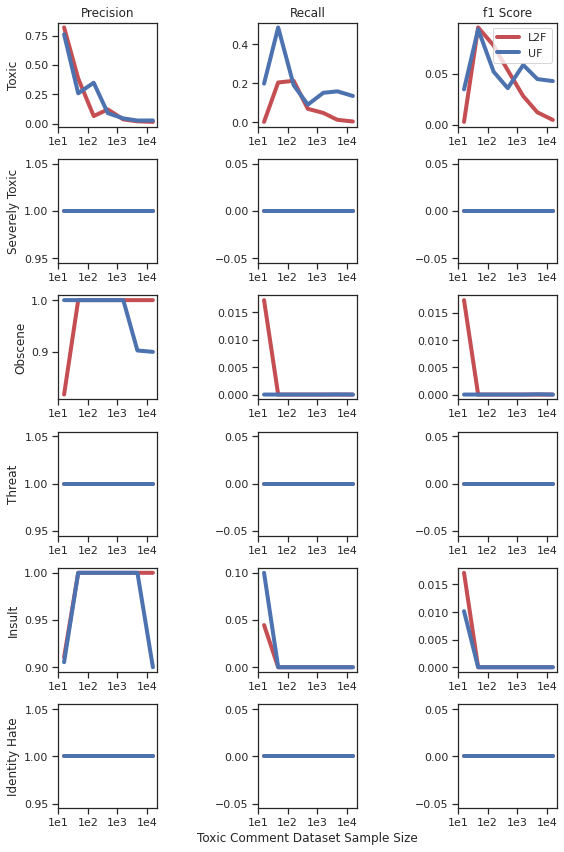

In [6]:
plot_figure()

In [8]:
display_reports()

REPORT: ------------------------------------------------------
[{'0': {'precision': 0.07599517490952955, 'recall': 0.010344827586206896, 'f1-score': 0.018210724093077033, 'support': 6090}, '1': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 367}, '2': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3691}, '3': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 211}, '4': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3427}, '5': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 712}, 'micro avg': {'precision': 0.07599517490952955, 'recall': 0.00434542695544213, 'f1-score': 0.008220786846741046, 'support': 14498}, 'macro avg': {'precision': 0.8459991958182549, 'recall': 0.0017241379310344827, 'f1-score': 0.0030351206821795057, 'support': 14498}, 'weighted avg': {'precision': 0.6118644375223504, 'recall': 0.00434542695544213, 'f1-score': 0.0076495592307103824, 'support': 14498}, 'samples avg': {'precision': 0.988027134327